# 다중분류 - 아이리스, 베스트모델, 조기종료

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
y_onehot = to_categorical(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습/평가

In [4]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
model = Sequential([ 
    Dense(12, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [14]:
mc = ModelCheckpoint('iris_best.h5', monitor='val_loss',
                     verbose=1, save_best_only=True)
es = EarlyStopping(patience=30)

In [15]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=1000, batch_size=100, verbose=0,
                 callbacks=[mc,es])


Epoch 1: val_loss improved from inf to 1.03154, saving model to iris_best.h5

Epoch 2: val_loss improved from 1.03154 to 1.02569, saving model to iris_best.h5

Epoch 3: val_loss improved from 1.02569 to 1.01989, saving model to iris_best.h5

Epoch 4: val_loss improved from 1.01989 to 1.01412, saving model to iris_best.h5

Epoch 5: val_loss improved from 1.01412 to 1.00842, saving model to iris_best.h5

Epoch 6: val_loss improved from 1.00842 to 1.00276, saving model to iris_best.h5

Epoch 7: val_loss improved from 1.00276 to 0.99713, saving model to iris_best.h5

Epoch 8: val_loss improved from 0.99713 to 0.99152, saving model to iris_best.h5

Epoch 9: val_loss improved from 0.99152 to 0.98593, saving model to iris_best.h5

Epoch 10: val_loss improved from 0.98593 to 0.98037, saving model to iris_best.h5

Epoch 11: val_loss improved from 0.98037 to 0.97485, saving model to iris_best.h5

Epoch 12: val_loss improved from 0.97485 to 0.96936, saving model to iris_best.h5

Epoch 13: val_lo

In [16]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.1413 - accuracy: 0.9333


[0.14130130410194397, 0.9333333373069763]

In [17]:
best_model = load_model('iris_best.h5')
best_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 225ms/step - loss: 0.1413 - accuracy: 0.9333


[0.14130130410194397, 0.9333333373069763]

In [18]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

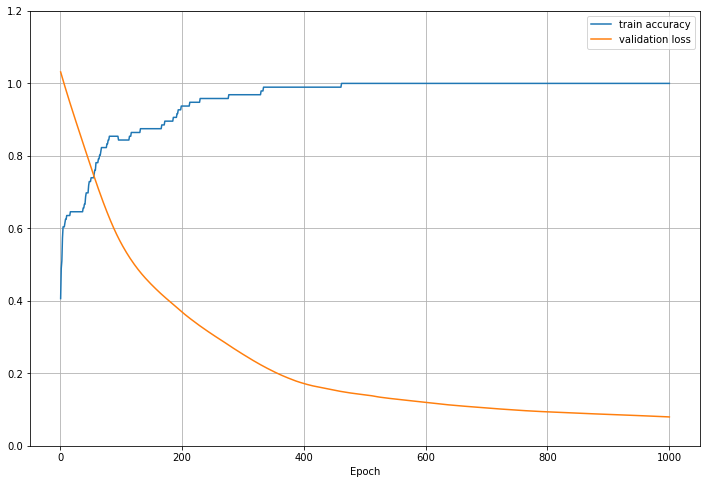

In [19]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()